# **EXERCÍCIO 1**

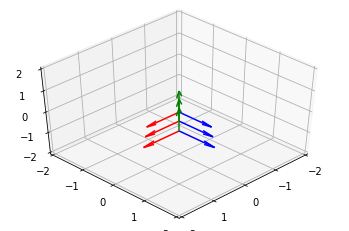

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from mpl_toolkits.mplot3d import Axes3D

######################################################################################
############################### FUNÇÕES DE ROTAÇÃO ###################################
######################################################################################
def rotx(phi):
    phi = np.radians(phi)  
    cp = np.cos(phi)
    sp = np.sin(phi)
    return np.array(( (1,  0,   0), 
                      (0, cp, -sp),
                      (0, sp,  cp) ))

def roty(theta):
    theta = np.radians(theta)  
    ct = np.cos(theta)
    st = np.sin(theta)
    return np.array(( (ct,  0, st), 
                      (  0, 1, 0 ),
                      (-st, 0, ct) ))

def rotz(psi):
    psi = np.radians(psi)  
    cp = np.cos(psi)
    sp = np.sin(psi)
    return np.array((  (cp, -sp, 0), 
                       (sp,  cp, 0),
                       ( 0,   0, 1) ))

def rotzyx(yaw, pitch, roll):
  return np.dot(rotz(yaw), roty(pitch)).dot(rotx(roll))

#Função que cria tranformações homogêneas
def t_homogenea3d(yaw, pitch, roll, xt, yt, zt):
  R = rotzyx(yaw, pitch, roll)
  return np.array(( (R[0][0], R[0][1], R[0][2], xt), 
                    (R[1][0], R[1][1], R[1][2], yt),
                    (R[2][0], R[2][1], R[2][2], zt),
                    (      0,       0,       0,  1) ))

######################################################################################
############################### APLICANDO AS ROTAÇÕES ################################
######################################################################################

#Vetores das setas do sistema {A}, dados no próprio referencial em coordenadas homogêneas
Oa = np.array((0,0,0,1)) # Origem {A}
Xa = np.array((1,0,0,1)) # seta do eixo x (vermelho) dadas em {A}
Ya = np.array((0,1,0,1)) # seta do eixo y (azul) dadas em {A}
Za = np.array((0,0,1,1)) # seta do eixo z (verde) dadas em {A}

Ob = np.array((0,0,0,1)) # Origem {B}
Xb = np.array((1,0,0,1)) # seta do eixo x (vermelho) dadas em {B}
Yb = np.array((0,1,0,1)) # seta do eixo y (azul) dadas em {B}
Zb = np.array((0,0,1,1)) # seta do eixo z (verde) dadas em {B}

Oc = np.array((0,0,0,1)) # Origem {C}
Xc = np.array((1,0,0,1)) # seta do eixo x (vermelho) dadas em {C}
Yc = np.array((0,1,0,1)) # seta do eixo y (azul) dadas em {C}
Zc = np.array((0,0,1,1)) # seta do eixo z (verde) dadas em {C}

#Rotações
T1 = t_homogenea3d(0,0,0,1,1,1) #Tranformação: Rotação em torno de z de 30° e deslocamento de 0.5 em x e y
Ob2a = np.dot(T1,Ob)
Xb2a = np.dot(T1,Xb)
Yb2a = np.dot(T1,Yb)
Zb2a = np.dot(T1,Zb)

T2 = t_homogenea3d(0,0,0,2,2,2) #Tranformação: Rotação em torno de z de 30° e deslocamento de 0.5 em x e y
Oc2b = np.dot(T2,Oc)
Xc2b = np.dot(T2,Xc)
Yc2b = np.dot(T2,Yc)
Zc2b = np.dot(T2,Zc)

######################################################################################
############################### PLOT #################################################
######################################################################################

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.quiver(Oa[0], Oa[1], Oa[2], Xa[0], Xa[1], Xa[2], color='r')
ax.quiver(Oa[0], Oa[1], Oa[2], Ya[0], Ya[1], Ya[2], color='b')
ax.quiver(Oa[0], Oa[1], Oa[2], Za[0], Za[1], Za[2], color='g')

ax.quiver(Ob2a[0], Ob2a[1], Ob2a[2], Xb2a[0]-Ob2a[0], Xb2a[1]-Ob2a[1], Xb2a[2]-Ob2a[2], color='r')
ax.quiver(Ob2a[0], Ob2a[1], Ob2a[2], Yb2a[0]-Ob2a[0], Yb2a[1]-Ob2a[1], Yb2a[2]-Ob2a[2], color='b')
ax.quiver(Ob2a[0], Ob2a[1], Ob2a[2], Zb2a[0]-Ob2a[0], Zb2a[1]-Ob2a[1], Zb2a[2]-Ob2a[2], color='g')

ax.quiver(Oc2b[0], Oc2b[1], Oc2b[2], Xc2b[0]-Oc2b[0], Xc2b[1]-Oc2b[1], Xc2b[2]-Oc2b[2], color='r')
ax.quiver(Oc2b[0], Oc2b[1], Oc2b[2], Yc2b[0]-Oc2b[0], Yc2b[1]-Oc2b[1], Yc2b[2]-Oc2b[2], color='b')
ax.quiver(Oc2b[0], Oc2b[1], Oc2b[2], Zc2b[0]-Oc2b[0], Zc2b[1]-Oc2b[1], Zc2b[2]-Oc2b[2], color='g')

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.zaxis.set_major_locator(MultipleLocator(1))

lim = 2.0
ax.set_xlim3d(-lim, lim)
ax.set_ylim3d(-lim,lim)
ax.set_zlim3d(-lim,lim)
ax.view_init(elev=45, azim=45)
plt.grid(True)
plt.show()

# **EXERCÍCIO 2**

C:\Users\vinic\AppData\Local\Temp/ipykernel_4088/802687253.py:82: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


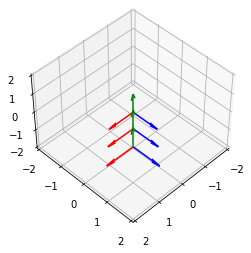

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from mpl_toolkits.mplot3d import Axes3D

######################################################################################
############################### FUNÇÕES DE ROTAÇÃO ###################################
######################################################################################
def rotx(phi):
    phi = np.radians(phi)  
    cp = np.cos(phi)
    sp = np.sin(phi)
    return np.array(( (1,  0,   0), 
                      (0, cp, -sp),
                      (0, sp,  cp) ))

def roty(theta):
    theta = np.radians(theta)  
    ct = np.cos(theta)
    st = np.sin(theta)
    return np.array(( (ct,  0, st), 
                      (  0, 1, 0 ),
                      (-st, 0, ct) ))

def rotz(psi):
    psi = np.radians(psi)  
    cp = np.cos(psi)
    sp = np.sin(psi)
    return np.array((  (cp, -sp, 0), 
                       (sp,  cp, 0),
                       ( 0,   0, 1) ))

def rotzyx(yaw, pitch, roll):
  return np.dot(rotz(yaw), roty(pitch)).dot(rotx(roll))

#Função que cria tranformações homogêneas
def t_homogenea3d(yaw, pitch, roll, xt, yt, zt):
  R = rotzyx(yaw, pitch, roll)
  return np.array(( (R[0][0], R[0][1], R[0][2], xt), 
                    (R[1][0], R[1][1], R[1][2], yt),
                    (R[2][0], R[2][1], R[2][2], zt),
                    (      0,       0,       0,  1) ))

######################################################################################
############################### APLICANDO AS ROTAÇÕES ################################
######################################################################################

#Vetores das setas do sistema {A}, dados no próprio referencial em coordenadas homogêneas
Oa = np.array((0,0,0,1)) # Origem {A}
Xa = np.array((1,0,0,1)) # seta do eixo x (vermelho) dadas em {A}
Ya = np.array((0,1,0,1)) # seta do eixo y (azul) dadas em {A}
Za = np.array((0,0,1,1)) # seta do eixo z (verde) dadas em {A}

Ob = np.array((0,0,0,1)) # Origem {B}
Xb = np.array((1,0,0,1)) # seta do eixo x (vermelho) dadas em {B}
Yb = np.array((0,1,0,1)) # seta do eixo y (azul) dadas em {B}
Zb = np.array((0,0,1,1)) # seta do eixo z (verde) dadas em {B}

Oc = np.array((0,0,0,1)) # Origem {C}
Xc = np.array((1,0,0,1)) # seta do eixo x (vermelho) dadas em {C}
Yc = np.array((0,1,0,1)) # seta do eixo y (azul) dadas em {C}
Zc = np.array((0,0,1,1)) # seta do eixo z (verde) dadas em {C}

#Rotações
T1 = t_homogenea3d(0,0,0,1,1,1) #Tranformação: Rotação em torno de z de 30° e deslocamento de 0.5 em x e y
Ob2a = np.dot(T1,Ob)
Xb2a = np.dot(T1,Xb)
Yb2a = np.dot(T1,Yb)
Zb2a = np.dot(T1,Zb)

T2 = t_homogenea3d(0,0,0,2,2,2) #Tranformação: Rotação em torno de z de 30° e deslocamento de 0.5 em x e y
Oc2b = np.dot(T2,Oc)
Xc2b = np.dot(T2,Xc)
Yc2b = np.dot(T2,Yc)
Zc2b = np.dot(T2,Zc)

######################################################################################
############################### PLOT #################################################
######################################################################################

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.quiver(Oa[0], Oa[1], Oa[2], Xa[0], Xa[1], Xa[2], color='r')
ax.quiver(Oa[0], Oa[1], Oa[2], Ya[0], Ya[1], Ya[2], color='b')
ax.quiver(Oa[0], Oa[1], Oa[2], Za[0], Za[1], Za[2], color='g')

ax.quiver(Ob2a[0], Ob2a[1], Ob2a[2], Xb2a[0]-Ob2a[0], Xb2a[1]-Ob2a[1], Xb2a[2]-Ob2a[2], color='r')
ax.quiver(Ob2a[0], Ob2a[1], Ob2a[2], Yb2a[0]-Ob2a[0], Yb2a[1]-Ob2a[1], Yb2a[2]-Ob2a[2], color='b')
ax.quiver(Ob2a[0], Ob2a[1], Ob2a[2], Zb2a[0]-Ob2a[0], Zb2a[1]-Ob2a[1], Zb2a[2]-Ob2a[2], color='g')

ax.quiver(Oc2b[0], Oc2b[1], Oc2b[2], Xc2b[0]-Oc2b[0], Xc2b[1]-Oc2b[1], Xc2b[2]-Oc2b[2], color='r')
ax.quiver(Oc2b[0], Oc2b[1], Oc2b[2], Yc2b[0]-Oc2b[0], Yc2b[1]-Oc2b[1], Yc2b[2]-Oc2b[2], color='b')
ax.quiver(Oc2b[0], Oc2b[1], Oc2b[2], Zc2b[0]-Oc2b[0], Zc2b[1]-Oc2b[1], Zc2b[2]-Oc2b[2], color='g')

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.zaxis.set_major_locator(MultipleLocator(1))

lim = 2.0
ax.set_xlim3d(-lim, lim)
ax.set_ylim3d(-lim,lim)
ax.set_zlim3d(-lim,lim)
ax.view_init(elev=45, azim=45)
plt.grid(True)
plt.show()